## chap01

In [1]:
import difflib
original = ["from __future__ import division, print_function, unicode_literals", ""]
edited = ["from __future__ import devision, print_function, unicode_literals", ""]
d = difflib.Differ()
diff = d.compare(original, edited)
print ('\n'.join(diff))

- from __future__ import division, print_function, unicode_literals
?                         ^

+ from __future__ import devision, print_function, unicode_literals
?                         ^

  


In [2]:
import matplotlib.pyplot as plt 
import numpy as np 
plt.style.use('tableau-colorblind10')

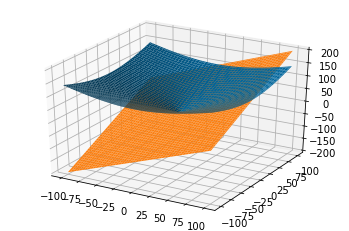

In [4]:
X = Y = np.linspace(-100, 100, 100)
X, Y = np.meshgrid(X, Y)
Z = np.sqrt(X**2 + Y**2)
new_Z =  np.array(X)+np.array(Y)

fig = plt.plot()
ax = plt.axes(projection='3d', label='3d')
## add label to avoid warning 
surf = ax.plot_surface(X, Y, Z)
new_surf = ax.plot_surface(X, Y, new_Z)
plt.show()


## chap02

In [21]:
arr = np.array([1, 2, 3, 4])
print(arr.shape, arr.ndim)
new_arr = arr.reshape(2,2)
print(new_arr.shape, new_arr.ndim)

(4,) 1
(2, 2) 2


In [22]:
sub_arr = arr[:3]
sub_arr = [1, 1, 1]
sub_arr, arr

([1, 1, 1], array([1, 2, 3, 4]))

In [23]:
## SHA secure hashing algorithm 
## SHA1 from NSA(National Security Agency) 
## hash algorithm is like a check digit at the bar code or credit card
## speed, if you change a bit, the whole ouput will change, hash collision 
## avoid artificial hash collision: vedify the documents 
## md5 is broken because the computer is faster enough now, sha1 may be broken in thr furture
## hash library: for security
import hashlib  
def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1]<256*test_ratio
def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5): 
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [24]:
## DataFrameSelector and CombineAttributesAdder
from sklearn.base import BaseEstimator, TransformerMixin 
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attributes_name):
        self.attributes_name = attributes_name
    def fit(self, X, y=None):
        return self 
    def transform(self, X):
        return X[self.attributes_name].values    

In [54]:
import numpy as array 
A = np.array([1, 2, 3])
B = np.array([[4, 5, 6]])
C = A[None:]
D = A[None]
print(A.shape, B.shape, C.shape, D.shape)

(3,) (1, 3) (3,) (1, 3)


1

## chap03

In [25]:
## https://gist.github.com/jhamrick/5320734
def save_fig(fig_id, tight_layout=True):
    directory = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
    if not os.path.exists(directory):
        os.makedirs(directory)
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print('Saving figure', fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [ ]:
## np.concatenate, np.r_, np.c_(build up along the second axis)
## **options for imshow 
 
def plot_digits(instances, num_per_row = 10, **options):
    m, n = np.shape(instances)
    size = int(n ** 0.5 )
    num_per_row = min(len(instances), num_per_row )
    num_rows = (len(instances) - 1)//num_per_row  + 1
    num_empty = num_per_row * num_rows - len(instances)
    ## print(images_per_row ,  num_rows, len(instances))
    ## lst.append
    images = np.concatenate((instances, np.zeros((num_empty, n))))
    images = np.reshape(images,(-1, size, size))
    image = []
    for row in range(num_rows):
        images_per_row = np.reshape(images[row*10:(row+1)*10, :, :],
                                   (size, num_per_row*size))
        plt.imshow(images_per_row, cmap='Blues', **options)
        print(np.shape(images_per_row))
        image.append(images_per_row)
    print(np.shape(np_image))
    ##plt.imshow(image, cmap='Blues', **options)
    ##plt.axis('off')

In [ ]:
from sklearn.model_selection import StratifiedKFold 
from sklearn.base import clone 

sk_folds = StratifiedKFold(n_splits = 3, random_state = 45, shuffle = True)
## shuffle need to be set as True 

for train_index, test_index in sk_folds.split(X_train, y_train_5): 
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict( X_test_fold)
    n_correct = sum(y_pred==y_test_fold )
    ratio = n_correct / len(y_test_fold)
    print(ratio)